In [69]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### K Means Clustering
- Clustering is an unsupervised machine learning model whose aim is to find similarities and patterns in data which is used to group the data points into subgroups based on their shared characteristics. 
- K means clustering is a simple clustering technique which aims to minimize the within cluster variance and sum of squared distances between data points and their corresponding cluster centroids.

### Description of Dataset
- This is a mall customer segmentation dataset where the aim is to classify these customers into different groups using the k means model.
- The features contained in this dataset are customerID, Gender, Age, Annual Income and Spending Score.
- Annual Income and Spending Score is used in this case to group the customers which is one of the approaches businesses use to understand customers through improve market strategies and targeted advertisement.

In [70]:
# read the data source
df = pd.read_csv("Mall_Customers.csv")

In [71]:
# This gives information about the structure of the dataset like data types, null values and size in memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
# check for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [73]:
# head prints out the first 5 rows of the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
# Adescription of the numerical features is displayed some of which are min, max and mean 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Observation
From the description table above, the features we will be using in the clustering algorithm Annual Income and Spending score are not of equal range which is why the min, max and mean values are different.
When using distant based models like k-means, standardization is performed to adjust the values into a common scale. This is done to facilitate data analysis and modelling to reduce the impact of different scales on the accuracy of the model.

In [75]:
# rename the columns to ease readability and debugging 
df.rename(columns= {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace=True)

In [76]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
from sklearn.preprocessing import StandardScaler


# Selected the features to be standardized
features_to_standardize = ['Annual Income', 'Spending Score']  

# An instance of the StandardScaler is created
scaler = StandardScaler()

# Selected features are standardized
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])


In [78]:
# viewing the standardized features on the dataframe
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,100.500000,38.850000,-6.128431e-16,-1.121325e-16
std,57.879185,13.969007,1.002509e+00,1.002509e+00
min,1.000000,18.000000,-1.738999e+00,-1.910021e+00
25%,50.750000,28.750000,-7.275093e-01,-5.997931e-01
50%,100.500000,36.000000,3.587926e-02,-7.764312e-03
75%,150.250000,49.000000,6.656748e-01,8.851316e-01
max,200.000000,70.000000,2.917671e+00,1.894492e+00


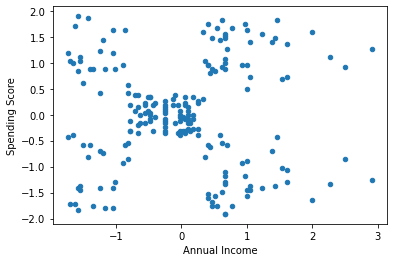

In [79]:
df.plot(x="Annual Income", y="Spending Score", kind='scatter')
plt.show()

In [80]:
# Select the last two columns to train the clustering model
X = df.iloc[:, -2:].values


### Using the Elbow Plot to choose number of Clusters
- Before segmenting the customer data using the most optimal number of clusters, one of the methods used to select the most appropriate number of clusters is the Elbow plot. 
- This plot is created using the sum of squared distances of data points to their nearest cluster centroid against the number of clusters. 
- This result is examined by identifying the elbow point where the sum of squared distances starts to plateau. The number of clusters at this point is therefore chosen as the optimal value.
- As seen on the elbow plot below, 5 is the optimal value thus this model will be trained using 5 clusters.


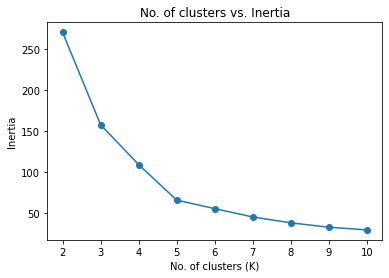

In [81]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [82]:
# Random state 42 is used to ensure the random numbers generated at any time the model is ran is in a consistent manner.
model = KMeans(n_clusters=5, random_state=42)

In [83]:
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [84]:
# printing out the centroids of each cluster
centroids = model.cluster_centers_
print(centroids)

[[-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [-1.32954532  1.13217788]
 [ 0.99158305  1.23950275]]


In [85]:
# return a label for each data point based on their cluster
y = model.fit_predict(x)

print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [86]:
df['labels'] = model.labels_

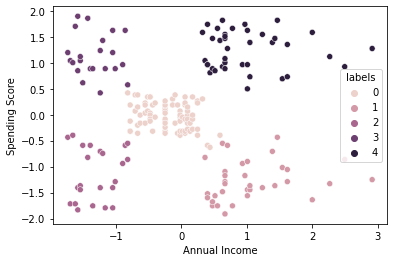

In [87]:
# A visualization of the customers in the 5 clusters generated is displayed. 
sns.scatterplot(x='Annual Income', y='Spending Score', 
                hue='labels', data = df)
plt.show()

# Conlusion
- Standardizing the data before building this model was an optimal way of increasing the model performance and accuracy as k-means is a distant based model thus any variant in these features will easily affect the model performance.
- Getting the most opptimal number of centroids also made this customer segmentation more optimal as the Elbow plot showed as the most appropriate number of clusters.
- K-means is therefore a simple and optimal unsupervised learning model used to segment and classify customers in different groups thus making it easier to manage these customers accordingly.